In [2]:
import sys
sys.path.insert(0,'..')
import src.preprocess as preprocess
import src.store_results as store_results
import src.plot as plot
import src.peak_area as peak_area
import src.analysis as analysis
import src.live_dev as live_dev
from datetime import datetime
import time
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
from datetime import datetime

# Input Data

In [5]:
source_1 = r"/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/source_live_data"
destination_1 = r"/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/live_data"
start_date_time_1 = datetime(2021, 6, 15, 0, 0, 0, 0)


# Create instance for preprocessing task

In [4]:
bagdata_1 = preprocess.Bag_data(source_1, destination_1, start_date_time_1)

## list all attributes

In [14]:
vars(bagdata_1)

{'source_folder': '/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/source_live_data',
 'destination_folder': '/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/live_data',
 'start_date_time': datetime.datetime(2021, 6, 15, 0, 0),
 'target_folder': '/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/live_data/Bag_data',
 'information': '/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/live_data/Bag_data/../information.csv'}

In [16]:
bagdata_1.source_folder

'/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/source_live_data'

### saving and loading bag_data instance.

In [5]:
bagdata_1_path =  preprocess.save_bagdata(bagdata_1)
bagdata_1 = preprocess.load_bagdata(destination_1)


save <class 'preprocess.Bag_data'> in /Users/nguyenminhhieu/Documents/Job/HIWI_JOB/live_data/bagdata.pkl


# Create instance for storing results task

- make folder
 

In [6]:
bagresult_1 = store_results.Bag_result(bagdata=bagdata_1, nameoption='_1')

In [7]:
datadict_1 = analysis.import_bagdata_as_dict(bagdata_1)


In [9]:
datadict_1

{0.0:        Frequency(ppm)  Intensity
 0           -26.35353   0.107323
 1           -26.35259   0.052622
 2           -26.35164   0.049266
 3           -26.35069   0.068784
 4           -26.34974  -0.034647
 ...               ...        ...
 65531        35.82679   0.014439
 65532        35.82774   0.027142
 65533        35.82869   0.085490
 65534        35.82964   0.043290
 65535        35.83059   0.219578
 
 [65536 rows x 2 columns],
 599.0:        Frequency(ppm)  Intensity
 0           -26.35453  -0.019322
 1           -26.35359  -0.053368
 2           -26.35264  -0.064002
 3           -26.35169  -0.051343
 4           -26.35074  -0.035936
 ...               ...        ...
 65531        35.82579   0.082252
 65532        35.82674   0.074498
 65533        35.82769   0.045847
 65534        35.82864   0.036459
 65535        35.82959   0.019024
 
 [65536 rows x 2 columns],
 1328.0:        Frequency(ppm)  Intensity
 0           -26.35354   0.043756
 1           -26.35260  -0.021364
 2  

In [8]:
interpolationdict_1 = analysis.interpolation_datadict(data_dict=datadict_1)

In [9]:
data_df_1 = analysis.make_datadf(datadict_1)

## we manipulate the data 

In [21]:
data_df_1

,Frequency,0.0,599.0,1328.0,1927.0,2526.0,3125.0,3724.0,4324.0,5053.0,...,6851.0,7451.0,8050.0,8779.0,9378.0,9978.0,10577.0,11177.0,11776.0,12505.0
0,-26.300000,-0.165063,0.007336,0.127178,-0.028913,0.002926,-0.119510,0.035421,0.001516,0.009827,...,-0.005915,0.014656,0.011736,0.158091,-0.039225,0.072721,-0.107194,0.057964,-0.004985,0.174729
1,-26.299052,0.036542,-0.001736,0.081849,0.062427,-0.011326,-0.092682,0.158102,0.010507,0.129846,...,-0.154760,0.213619,0.026710,0.186891,-0.085154,0.051807,-0.137661,0.036723,-0.029309,-0.144942
2,-26.298104,-0.066864,-0.004320,-0.031266,0.092060,0.087904,0.020622,0.141584,0.017441,0.100182,...,0.045273,0.123936,0.034381,0.041917,-0.062289,0.012346,-0.123189,-0.179275,-0.029888,-0.030880
3,-26.297156,0.121666,0.003571,0.008018,0.074810,0.108325,0.142890,-0.022208,0.038600,-0.035431,...,-0.090532,-0.043526,0.005722,0.008619,0.051954,-0.037585,-0.006864,-0.088702,-0.038397,-0.064761
4,-26.296208,0.299391,0.012426,0.156127,-0.050951,0.102743,0.040561,0.050867,0.051716,0.248393,...,-0.295053,-0.152962,-0.022036,0.006948,0.135360,-0.008103,0.098926,-0.056394,-0.041900,-0.222548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65531,35.816208,0.043710,0.038175,-0.064968,0.067073,0.115540,-0.113466,-0.120022,-0.013117,0.090577,...,0.098338,0.077519,0.036530,0.009336,-0.079196,-0.028410,0.195694,-0.030130,0.003319,0.037775
65532,35.817156,0.210361,0.060347,0.104096,-0.012909,-0.152832,0.130199,0.107530,-0.010458,-0.085334,...,0.184176,0.151957,0.037533,0.126904,-0.068064,0.120258,-0.024021,-0.038506,0.014292,0.181644
65533,35.818104,-0.086330,0.064204,0.116917,-0.051878,-0.056489,0.028479,0.177478,-0.027645,0.128377,...,0.014086,-0.071293,0.021868,0.079264,-0.106445,-0.089925,-0.203751,0.181288,0.025678,0.004025
65534,35.819052,0.062963,0.031838,0.111631,0.314104,0.079009,-0.072381,0.028017,-0.069791,0.001360,...,-0.007644,0.053788,-0.001437,0.011237,0.018119,-0.089716,0.058398,0.038718,0.036424,0.057643


In [22]:
vars(bagresult_1)
#delattr(bagresult_1, 'datadict')

{'bagdata': Bag_data(2021-06-15 00:00:00),
 'nameoption': '_1',
 'analysis_results': '/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/live_data/Bag_result_1',
 'data_dir': '/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/live_data/Bag_result_1/data',
 'plot_dir': '/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/live_data/Bag_result_1/plots'}

### saving df and dict as attribute of bag_result 

In [10]:
analysis.save_df_in_bagresult(data_df_1, bagresult_1, 'fulldata_df')

save fulldata_df.csv in /Users/nguyenminhhieu/Documents/Job/HIWI_JOB/live_data/Bag_result_1/data/fulldata_df.csv


'/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/live_data/Bag_result_1/data/fulldata_df.csv'

In [37]:
vars(bagresult_1)

{'bagdata': Bag_data(2021-06-15 00:00:00),
 'nameoption': '_1',
 'analysis_results': '/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/live_data/Bag_result_1',
 'data_dir': '/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/live_data/Bag_result_1/data',
 'plot_dir': '/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/live_data/Bag_result_1/plots',
 'fulldata_df': '/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/live_data/Bag_result_1/data/fulldata_df.csv',
 'fulldata_dict': '/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/live_data/Bag_result_1/data/fulldata_dict.npy',
 'interpolate_dict': '/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/live_data/Bag_result_1/data/interpolate_dict.npy'}

In [11]:
analysis.save_dict_in_bagresult(datadict_1, bagresult_1, 'fulldata_dict')

save data dict in /Users/nguyenminhhieu/Documents/Job/HIWI_JOB/live_data/Bag_result_1/data/fulldata_dict.npy


'/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/live_data/Bag_result_1/data/fulldata_dict.npy'

In [12]:
analysis.save_dict_in_bagresult(interpolationdict_1, bagresult_1, 'interpolate_dict')

save data dict in /Users/nguyenminhhieu/Documents/Job/HIWI_JOB/live_data/Bag_result_1/data/interpolate_dict.npy


'/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/live_data/Bag_result_1/data/interpolate_dict.npy'

In [38]:
store_results.save_bagresult(bagresult=bagresult_1)

save <class 'store_results.Bag_result'> in /Users/nguyenminhhieu/Documents/Job/HIWI_JOB/live_data/Bag_result_1/bagresult.pkl


'/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/live_data/Bag_result_1/bagresult.pkl'

In [13]:
store_results.save_bagresult(bagresult=bagresult_1)

save <class 'store_results.Bag_result'> in /Users/nguyenminhhieu/Documents/Job/HIWI_JOB/live_data/Bag_result_1/bagresult.pkl


'/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/live_data/Bag_result_1/bagresult.pkl'

# Analysis task

In [28]:
data_df_1

,Frequency,0.0,599.0,1328.0,1927.0,2526.0,3125.0,3724.0,4324.0,5053.0,...,6851.0,7451.0,8050.0,8779.0,9378.0,9978.0,10577.0,11177.0,11776.0,12505.0
0,-26.300000,-0.165063,0.007336,0.127178,-0.028913,0.002926,-0.119510,0.035421,0.001516,0.009827,...,-0.005915,0.014656,0.011736,0.158091,-0.039225,0.072721,-0.107194,0.057964,-0.004985,0.174729
1,-26.299052,0.036542,-0.001736,0.081849,0.062427,-0.011326,-0.092682,0.158102,0.010507,0.129846,...,-0.154760,0.213619,0.026710,0.186891,-0.085154,0.051807,-0.137661,0.036723,-0.029309,-0.144942
2,-26.298104,-0.066864,-0.004320,-0.031266,0.092060,0.087904,0.020622,0.141584,0.017441,0.100182,...,0.045273,0.123936,0.034381,0.041917,-0.062289,0.012346,-0.123189,-0.179275,-0.029888,-0.030880
3,-26.297156,0.121666,0.003571,0.008018,0.074810,0.108325,0.142890,-0.022208,0.038600,-0.035431,...,-0.090532,-0.043526,0.005722,0.008619,0.051954,-0.037585,-0.006864,-0.088702,-0.038397,-0.064761
4,-26.296208,0.299391,0.012426,0.156127,-0.050951,0.102743,0.040561,0.050867,0.051716,0.248393,...,-0.295053,-0.152962,-0.022036,0.006948,0.135360,-0.008103,0.098926,-0.056394,-0.041900,-0.222548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65531,35.816208,0.043710,0.038175,-0.064968,0.067073,0.115540,-0.113466,-0.120022,-0.013117,0.090577,...,0.098338,0.077519,0.036530,0.009336,-0.079196,-0.028410,0.195694,-0.030130,0.003319,0.037775
65532,35.817156,0.210361,0.060347,0.104096,-0.012909,-0.152832,0.130199,0.107530,-0.010458,-0.085334,...,0.184176,0.151957,0.037533,0.126904,-0.068064,0.120258,-0.024021,-0.038506,0.014292,0.181644
65533,35.818104,-0.086330,0.064204,0.116917,-0.051878,-0.056489,0.028479,0.177478,-0.027645,0.128377,...,0.014086,-0.071293,0.021868,0.079264,-0.106445,-0.089925,-0.203751,0.181288,0.025678,0.004025
65534,35.819052,0.062963,0.031838,0.111631,0.314104,0.079009,-0.072381,0.028017,-0.069791,0.001360,...,-0.007644,0.053788,-0.001437,0.011237,0.018119,-0.089716,0.058398,0.038718,0.036424,0.057643


### 2D and 3D plot 

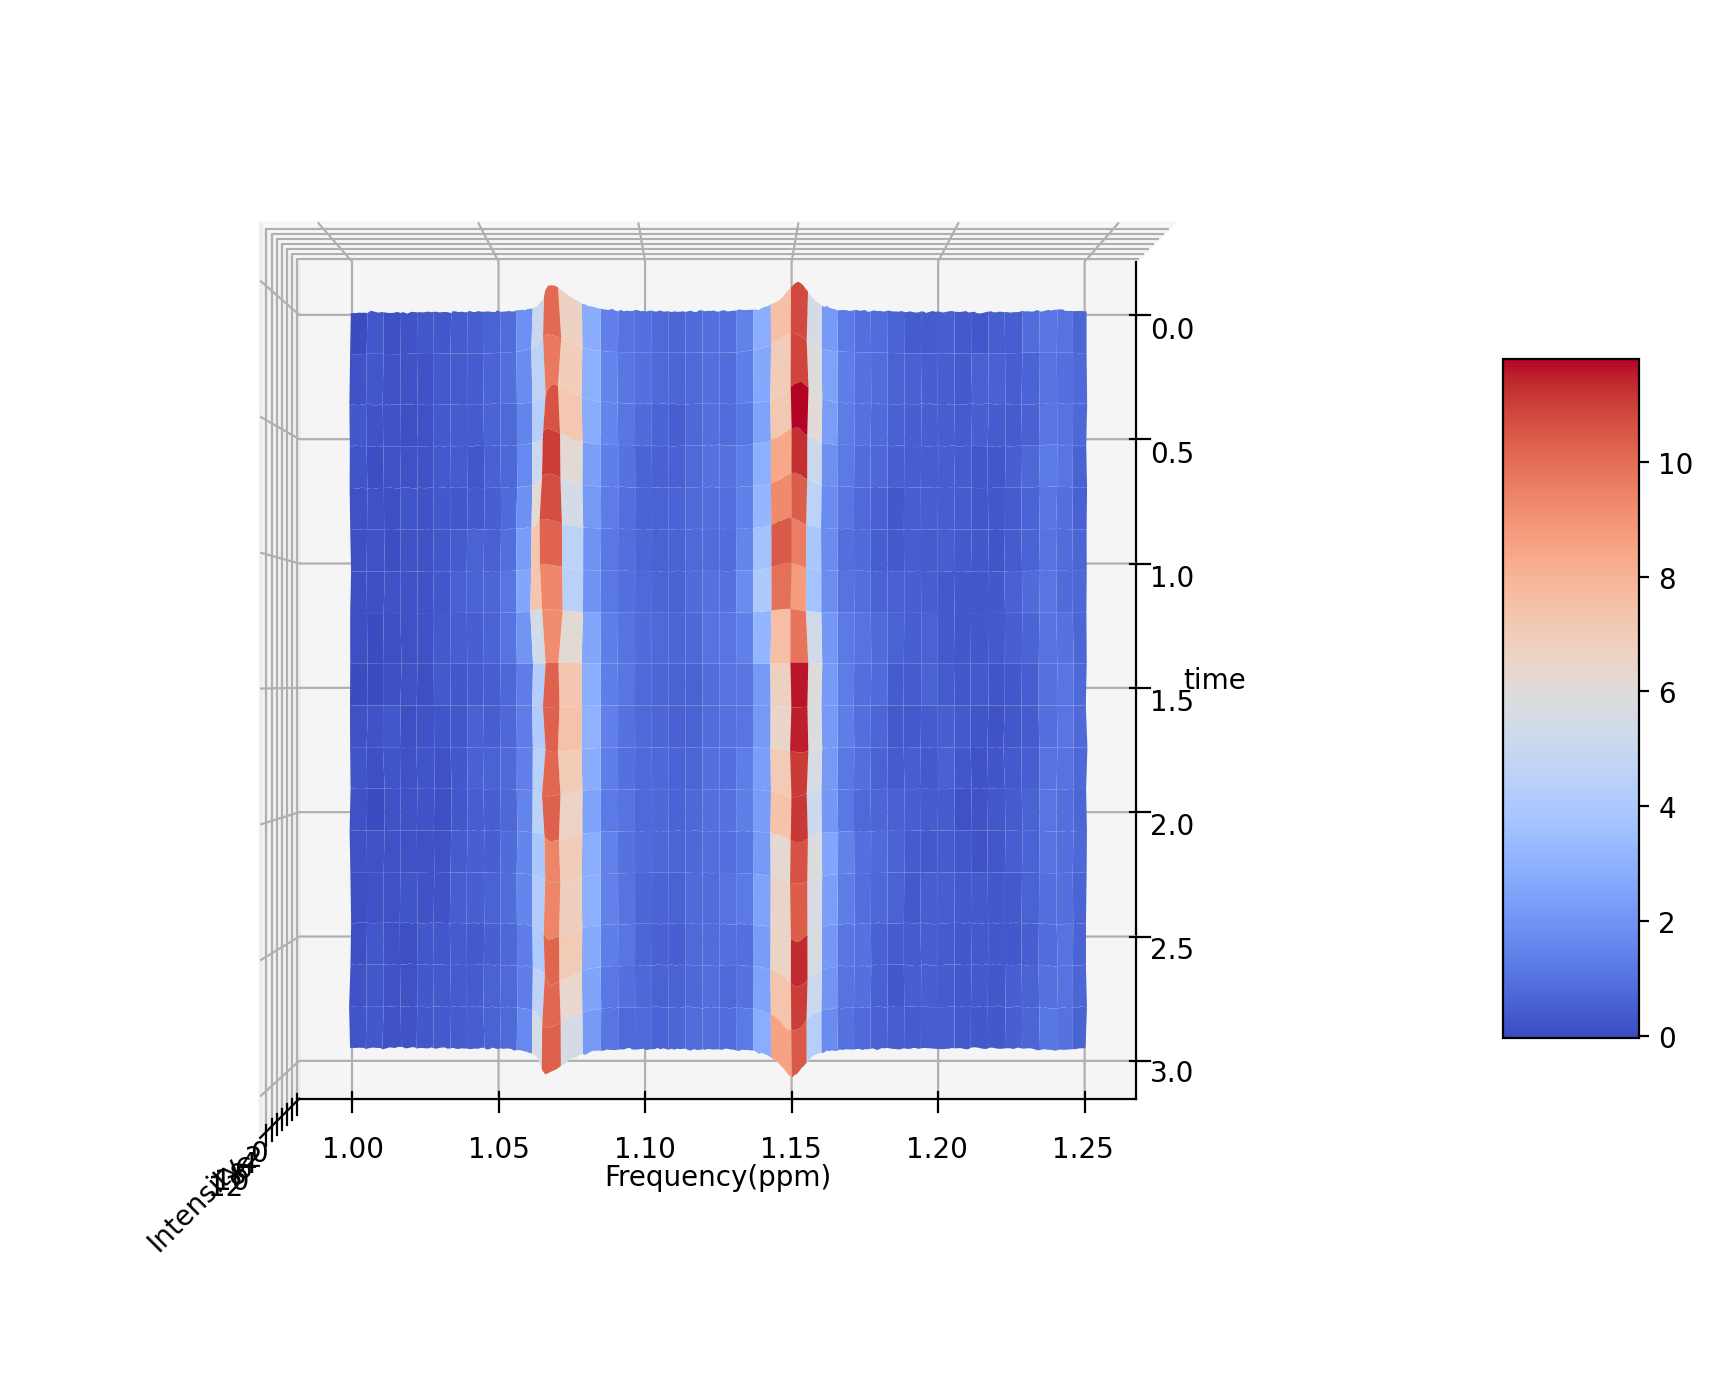

In [35]:
fig_3D = analysis.plot_3D(data_df_1, timestr=0,timeend=3,ppmstr=1,ppmend=1.25, view_op1= 90, view_op2=0)

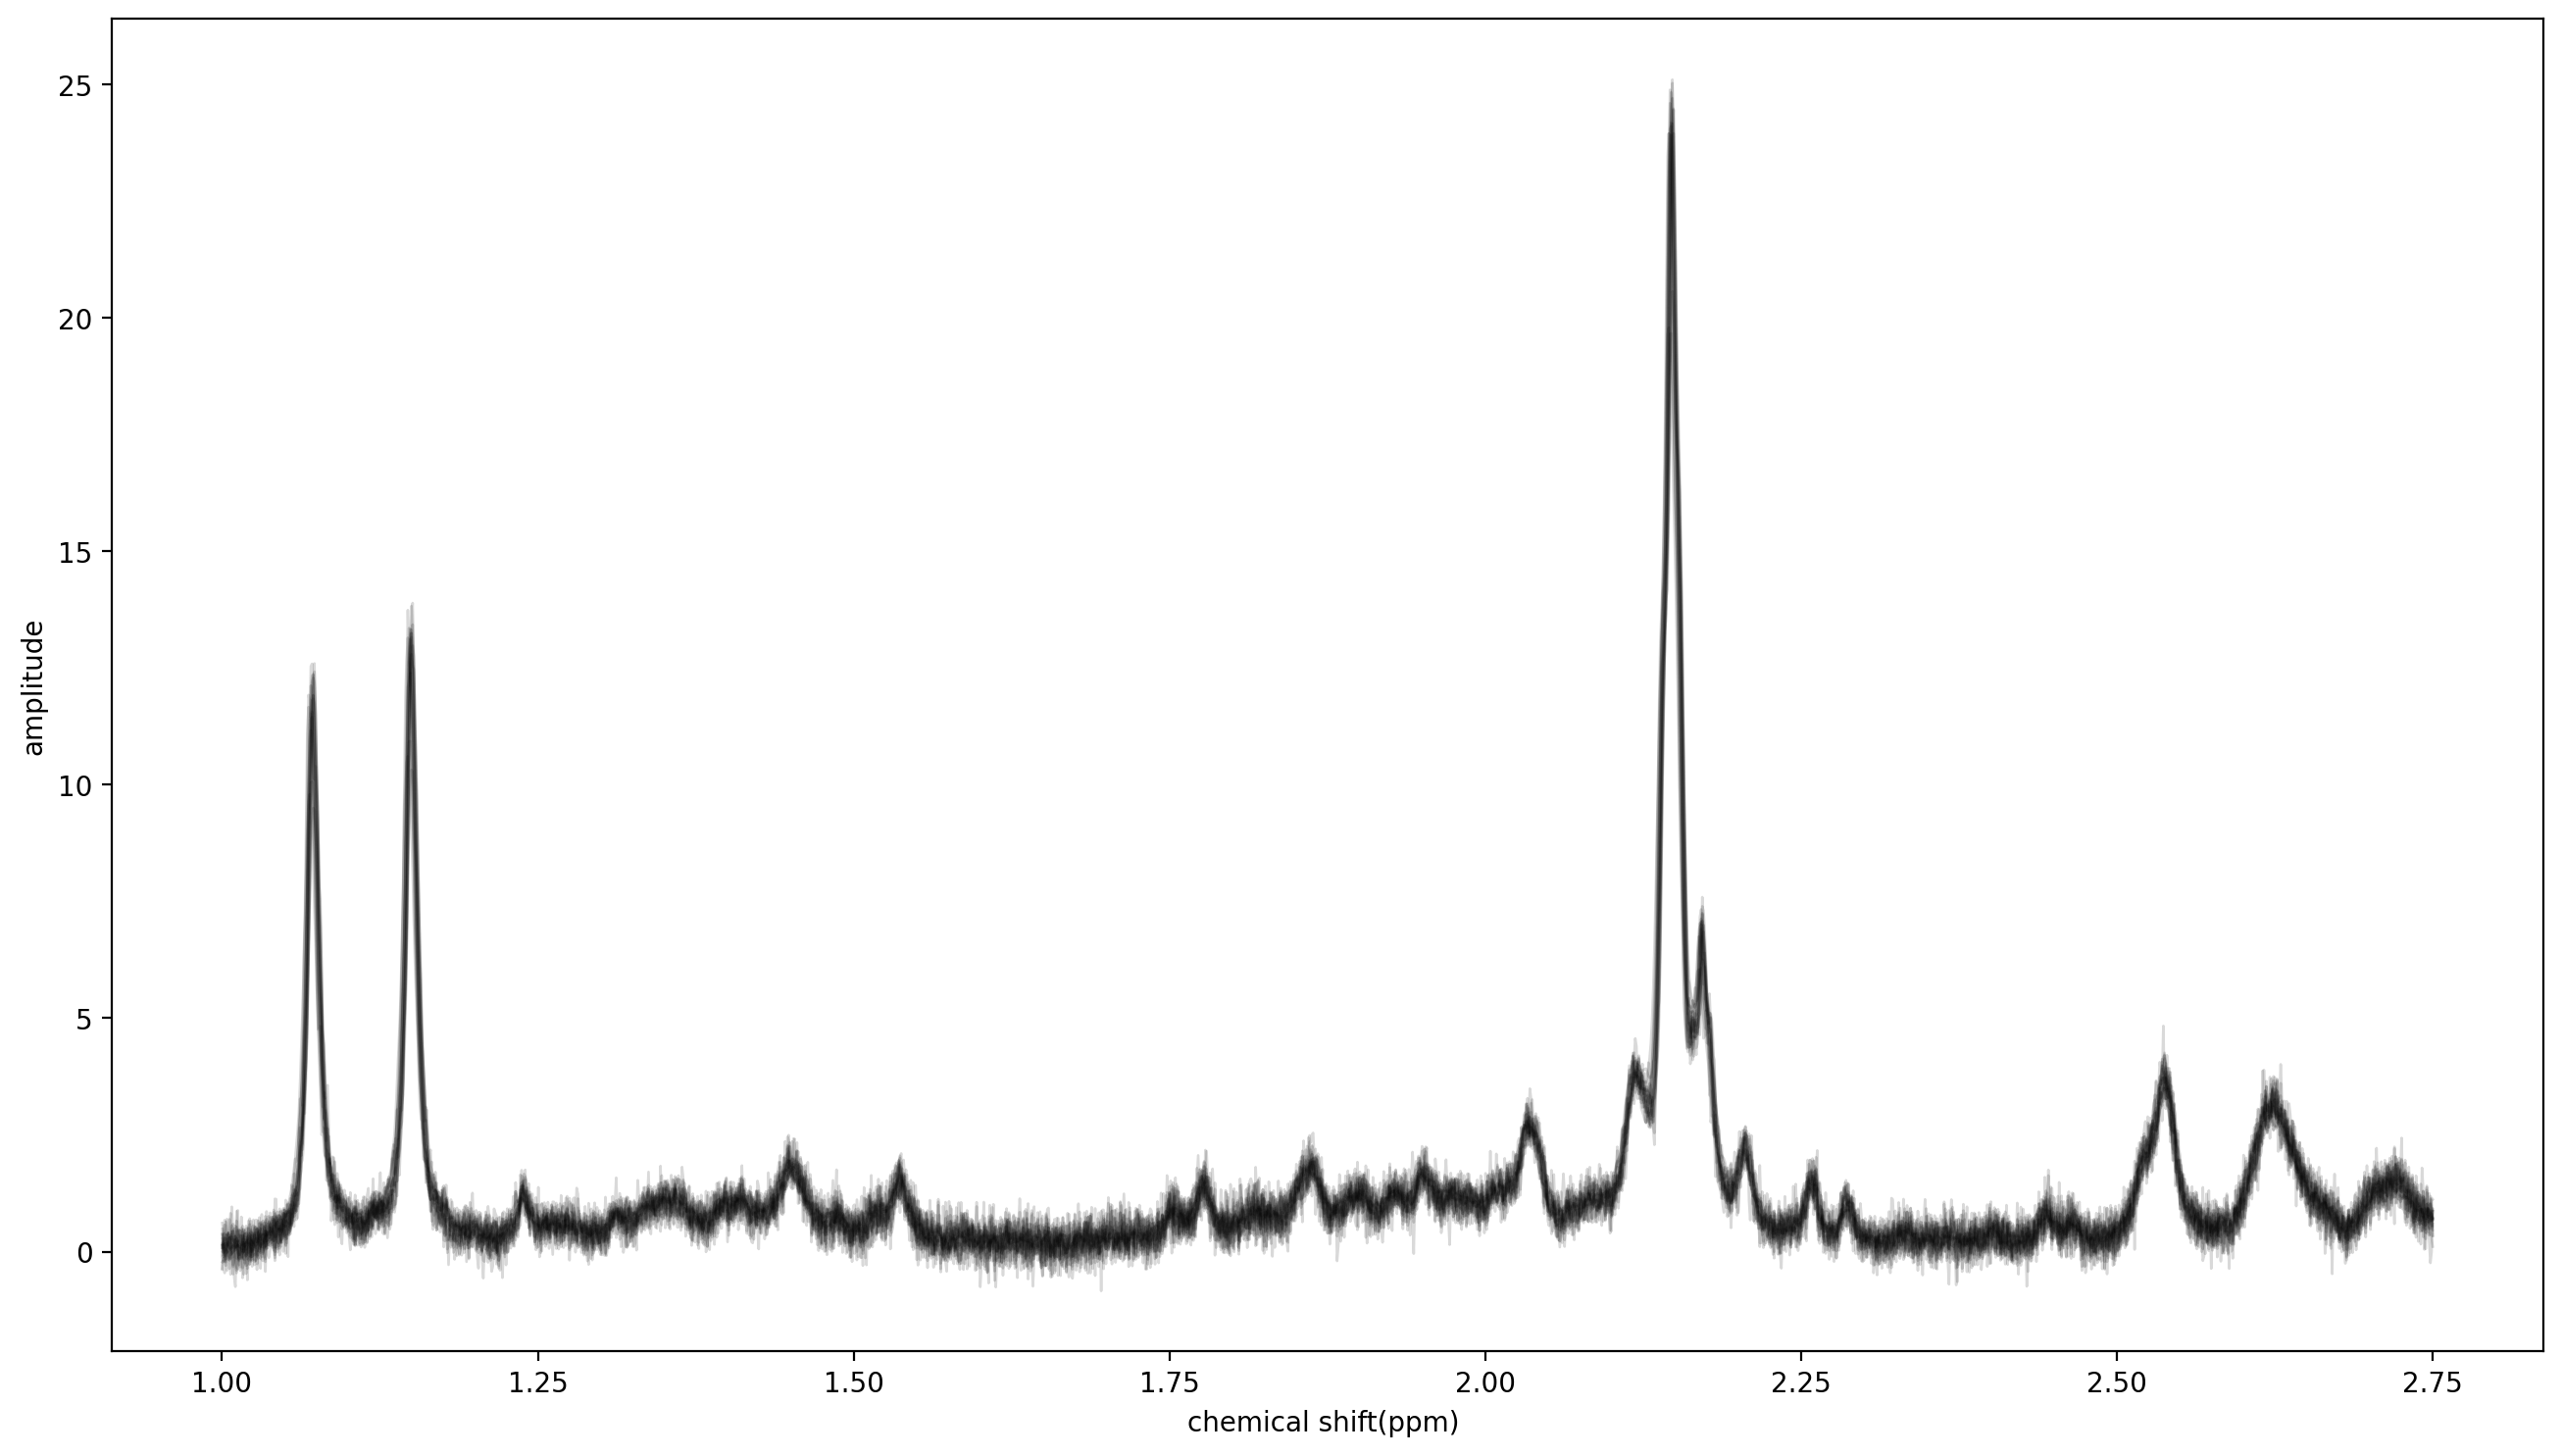

In [30]:
fig_2D = analysis.plot_2d(data_df_1, timestr=0,timeend=3,ppmstr=1,ppmend=2.75)#plot_option='ppm'

### peak area df

In [17]:
import numpy as np 
a= np.array([1.215,1.024])

In [19]:
type(a)

numpy.ndarray